In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [60]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


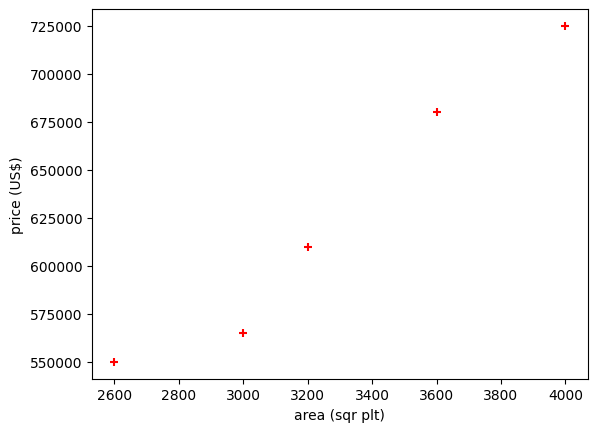

In [61]:
%matplotlib inline
plt.xlabel('area (sqr plt)')
plt.ylabel('price (US$)')
plt.scatter(df.area,df.price, color = 'red', marker = '+')

In [62]:
reg = linear_model.LinearRegression()
reg.fit(df[["area"]], df[["price"]])

LinearRegression()

In [63]:
prediction = reg.predict(pd.DataFrame({'area': [3300]}))
print(prediction)

[[628715.75342466]]


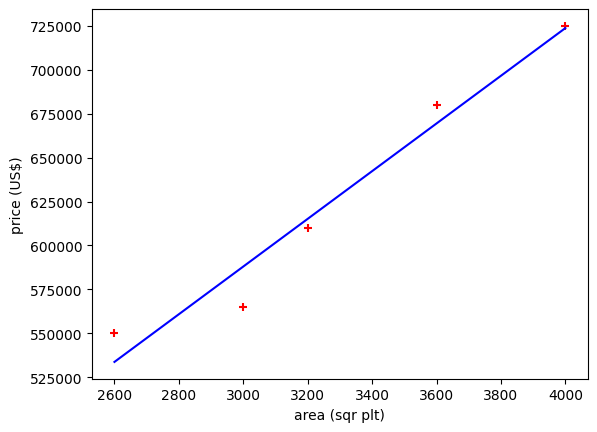

In [64]:
%matplotlib inline
plt.xlabel('area (sqr plt)')
plt.ylabel('price (US$)')
plt.scatter(df.area,df.price, color = 'red', marker = '+')
plt.plot(df.area, reg.predict(df[['area']]), color = 'blue')

In [65]:
reg.coef_ # y = m*x + b => m

array([[135.78767123]])

In [66]:
reg.intercept_ # y = m*x + b => b

array([180616.43835616])

In [67]:
prediction = reg.predict(pd.DataFrame({"area" : [5000]}))
print(prediction)

[[859554.79452055]]


In [68]:
d = pd.read_csv("areas.csv")
d

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [69]:
p = reg.predict(d)

In [70]:
d["price"] = p

In [71]:
d.to_csv("prediction.csv")

Exercise

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [73]:
df = pd.read_csv("canada_per_capita_income.csv")
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


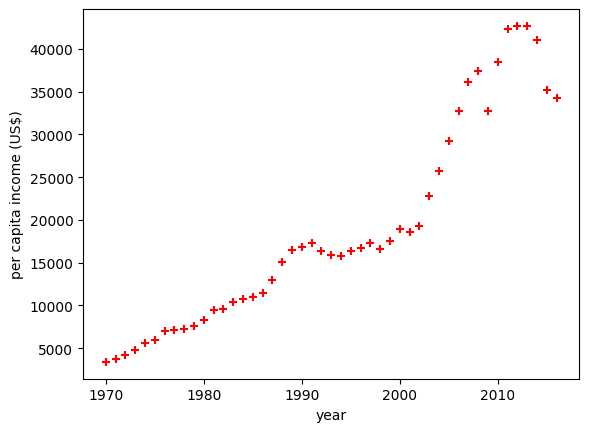

In [74]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(df["year"],df["per capita income (US$)"], color = "red", marker = "+")

In [75]:
reg = linear_model.LinearRegression()
reg.fit(df[["year"]], df[["per capita income (US$)"]])


LinearRegression()

In [76]:
prediction = reg.predict(pd.DataFrame({"year" : [2020]}))
print(prediction)

[[41288.69409442]]


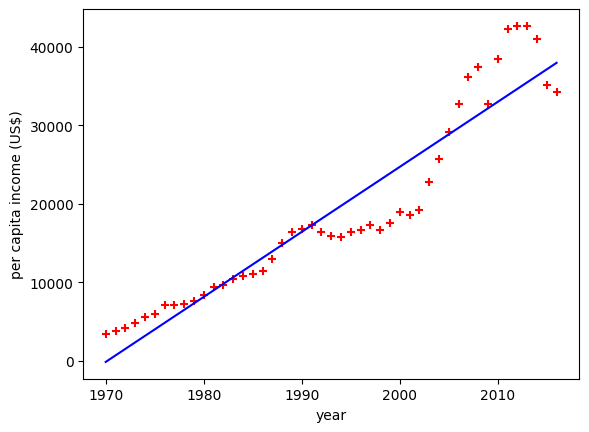

In [77]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(df["year"],df["per capita income (US$)"], color = "red", marker = "+")
plt.plot(df["year"], reg.predict(df[["year"]]), color = "blue")

Multi variable linear regression

In [78]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [79]:
df = pd.read_csv("homeprices (1).csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [80]:
bedroom_median = df.bedrooms.median()
bedroom_median

4.0

In [81]:
df.bedrooms = df.bedrooms.fillna(bedroom_median)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [82]:
reg = linear_model.LinearRegression()
reg.fit(df[["area", "bedrooms", "age"]], df[["price"]])

LinearRegression()

In [83]:
reg.coef_

array([[  112.06244194, 23388.88007794, -3231.71790863]])

In [84]:
reg.intercept_

array([221323.0018654])

In [85]:
prediction = reg.predict([[3000,3,40]])
print(prediction)

[[498408.25158031]]


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [86]:
reg.predict([[2500,4,5]])

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[578876.03748933]])

Exercise

In [87]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from word2number import w2n
import math

In [88]:
df = pd.read_csv("hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [89]:
df.experience = df.experience.fillna(0)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [90]:
test_score_mean = math.floor(df["test_score(out of 10)"].mean())
test_score_mean

7

In [91]:
df["test_score(out of 10)"] = df["test_score(out of 10)"].fillna(test_score_mean)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [92]:
df["experience"] = df["experience"].astype(str).apply(w2n.word_to_num)

In [93]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [94]:
reg = linear_model.LinearRegression()
reg.fit(df[["experience", "test_score(out of 10)", "interview_score(out of 10)"]], df[["salary($)"]])

LinearRegression()

In [95]:
print(reg.predict([[2,9,6]]))
print(reg.predict([[12,10,10]]))

[[53713.86677124]]
[[93747.79628651]]


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [99]:
import numpy as np

def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 10000
    n = len(x)
    learning_rate = 0.09

    for i in range(iterations):
        y_predicterd = m_curr * x + b_curr
        cost = (1/n) * sum([val**2 for val in (y-y_predicterd)])
        md = -(2/n) * sum(x*y-y_predicterd)
        bd = -(2/n) * sum(y-y_predicterd)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print("m {}, b {},cost {}, iteration {}".format(m_curr,b_curr,cost,i))

x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])
gradient_descent(x,y)


m 5.58, b 1.6199999999999999,cost 89.0, iteration 0
m 7.8552, b -0.06480000000000019,cost 113.24240000000003, iteration 1
m 9.205056, b -2.674944,cost 278.8399347199999, iteration 2
m 10.29581568, b -5.544184319999999,cost 357.91640509644805, iteration 3
m 11.3140283904, b -8.4859716096,cost 404.74335192800964, iteration 4
m 12.311927949312, b -11.448072050688001,cost 444.3059232666299, iteration 5
m 13.30413982580736, b -14.415860174192641,cost 484.5163563727149, iteration 6
m 14.29475915122606, b -17.38524084877394,cost 527.7036232477739, iteration 7
m 15.284932562343297, b -20.355067437656704,cost 574.540414063284, iteration 8
m 16.27498111745612, b -23.325018882543876,cost 625.2199646740992, iteration 9
m 17.264994712887713, b -26.295005287112282,cost 679.7976793173707, iteration 10
m 18.25499851960856, b -29.265001480391437,cost 738.2894292706052, iteration 11
m 19.244999585490397, b -32.2350004145096,cost 800.6997583333182, iteration 12
m 20.23499988393731, b -35.205000116062685,